In [120]:

import matplotlib.pyplot as plt
import numpy as np


def updateweights(xtrain , ytrain , ypreds , weights ,LR):

    new_params = []
    
    for i , w in zip(range(len(weights)) , weights):
        par_dev = cal_par_dev(ypreds , ytrain , xtrain,i)
        new_w = w - (LR * par_dev)
        new_params.append(new_w)
    
    return new_params


def cal_par_dev(ypred , yact , xtrain,i):
    sum = 0
    for x,ya,yp in zip(xtrain , yact , ypred):
        sum+= (yp - ya)*x[i]

    return sum/len(xtrain)



# def cal_cost (ypred , yact):
#     sum = 0
#     for yp , ya in zip(ypred , yact):
#         sum+= (ya - yp)**2
    
#     return sum/len(ypred)

def fit(xtrain , ytrain , weights , LR = 0.0001 , epochs = 100 ):
    
    correct = False
    counter = 0
    cost = []
    while counter < epochs  :
        preds = []
        for i,y in zip(xtrain,ytrain):
            z = 0
            for x,w in zip(i , weights):
                z += w*x

            if z > 0:    
                y_pred = 1
            else:  
                y_pred = -1
            preds.append(y_pred)
                
           

        # cost.append(cal_cost(preds , ytrain))
        
        if preds == ytrain :
            break
        counter+=1

        new_params = updateweights(xtrain , ytrain , preds , weights , LR)
        if new_params == weights:
            break
        else:
            weights = new_params
            
    # print('costs:' ,cost)
    return weights


def plot(w,x,y):
    m = -w[1] / w[2]
    b = -w[0] / w[2]

    x_values = np.linspace(-2, 2, 100)  

    y_values = m * x_values + b

    plt.plot(x_values, y_values, label='Decision Boundary', color='red')

    x_values = [point[1] for point in x]
    y_values = [point[2] for point in x]

    for i in range(len(x)):
        marker = 'x' if y[i] == 1 else 'o'
        plt.scatter(x_values[i], y_values[i], marker=marker)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundry')
    plt.legend()
    plt.grid(True)
    plt.show()


def predict(xtest , weights):
    preds = []
    for i in xtest:
            z = 0
            for x,w in zip(i , weights):
                z += w*x

            if z > 0:    
                y_pred = 1
            else:  
                y_pred = -1
            preds.append(y_pred)

    return preds

[0.00010000000000000002, 0.0001, 0.0001]


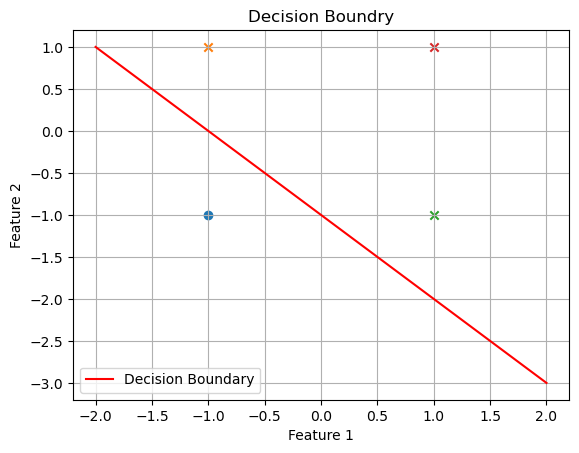

In [121]:
xtrain= [(1.0, -1.0, -1.0), 
         (1.0, -1.0, 1.0), 
         (1.0, 1.0, -1.0), 
         (1.0, 1.0, 1.0)]

OR = [-1,1,1,1]


weights = fit(xtrain=xtrain , ytrain=OR , weights= [0,0,0] , LR=0.0001)
print(weights)
plot(weights,xtrain,OR)





# Iris Dataset

In [122]:
import pandas as pd
iris = pd.read_csv(r"C:\Users\Hp\Desktop\Iris.csv") 
iris = iris[iris['Species'].isin(['Iris-setosa', 'Iris-versicolor'])]
mapp = {'Iris-setosa' : 1 , 'Iris-versicolor' : -1}

iris['Species'] = iris['Species'].map(mapp)
iris.insert(0, 'Bias', 1)
iris.drop('Id' , axis= 1 , inplace=True)

y = iris.pop('Species').tolist()


#train test split
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(iris , y , train_size= 0.8)


xtrain = [tuple(x) for x in X_train.values]
xtest = [tuple(x) for x in X_test.values]


In [123]:
for i in range(0,5):
    weights = []
    import random
    for i in range(len(xtrain[1])):
        weights.append(random.uniform(-1,1))

    LR = random.uniform(0,1)
    epochs =  round(random.uniform(100, 2000))

    print('initial weights')
    for i in range(len(weights)):
        print(f'w{i} =', '%5.2f' % weights[i])

    print(f'LR : {LR} Epochs : {epochs}') 

    weights = fit(xtrain=xtrain , ytrain=y_train , weights= weights  , LR = LR ,  epochs = epochs)
    print('\nfinal weights')

    for i in range(len(weights)):
        print(f'w{i} =', '%5.2f' % weights[i])


    from sklearn.metrics import accuracy_score , f1_score , recall_score , precision_score
    p = predict(xtest,weights)
    print('\naccuracy_score : ' , accuracy_score(y_test ,p) )
    print('F1 score:', f1_score(y_test, p))
    print('Recall:', recall_score(y_test , p))
    print('Precision:', precision_score(y_test , p), '\n')

initial weights
w0 =  0.42
w1 =  0.47
w2 = -0.57
w3 = -0.39
w4 = -0.17
LR : 0.4714119516281936 Epochs : 1592

final weights
w0 =  0.73
w1 =  0.58
w2 =  1.71
w3 = -4.51
w4 = -1.87

accuracy_score :  1.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0 

initial weights
w0 =  0.86
w1 =  0.78
w2 =  0.94
w3 = -0.37
w4 =  0.69
LR : 0.23899533530773043 Epochs : 1927

final weights
w0 =  0.83
w1 =  0.21
w2 =  1.20
w3 = -1.79
w4 =  0.14

accuracy_score :  1.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0 

initial weights
w0 =  0.80
w1 = -0.46
w2 = -0.64
w3 =  0.75
w4 = -0.93
LR : 0.8059878574502154 Epochs : 185

final weights
w0 =  1.61
w1 =  1.35
w2 =  3.72
w3 = -4.85
w4 = -3.35

accuracy_score :  1.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0 

initial weights
w0 = -0.18
w1 =  0.27
w2 = -0.94
w3 = -0.39
w4 =  0.08
LR : 0.5543055423195413 Epochs : 1225

final weights
w0 =  0.37
w1 =  1.52
w2 =  2.06
w3 = -4.24
w4 = -1.58

accuracy_score :  1.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0 

initial weights
w0 =

[0.6247322725114002, 0.9451520745301543, 4.107863744270441, -4.728485316261506, -2.709395264576658]


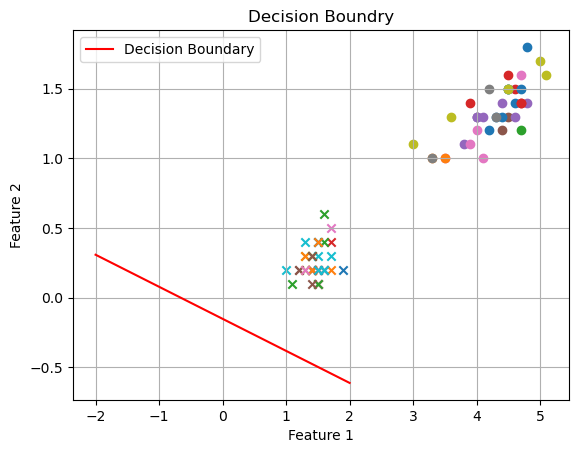

In [124]:
new_list = [(t[0], t[3] , t[4]) for t in xtrain]
print(weights)
plot(weights,new_list,y_train)

- The dataset had 5 attributes thats why the line looks weird
    - that's  why i didnt plot for every iteration
- All accuracies are 100% which is kinda sus tho 

# Breast Cancer Dataset

In [125]:
bres = pd.read_csv(r"C:\Users\Hp\Desktop\breast-cancer.csv")
mapp = {'B' : 1 , 'M' : -1}

bres['diagnosis'] = bres['diagnosis'].map(mapp)
bres.drop('id', axis=1 , inplace=True)
bres.insert(0, 'Bias', 1)

y = bres.pop('diagnosis').tolist()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = sc.fit_transform(bres)

bres = pd.DataFrame(df, columns=bres.columns)

#train test split
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(bres , y , train_size= 0.8)


xtrain = [tuple(x) for x in X_train.values]
xtest = [tuple(x) for x in X_test.values]

In [126]:
#Changing LR Epochs constant at 1000
LRs = []
# Epochs = []
accu = []
for i in range(0,5):
    weights = []
    import random
    for i in range(len(xtrain[1])):
        weights.append(random.uniform(-1,1))

    LR = random.uniform(0,1)
    #epochs =  round(random.uniform(100, 2000))
    LRs.append(LR)
    #Epochs.append(epochs)
    

    print(f'LR : {LR}') 

    weights = fit(xtrain=xtrain , ytrain=y_train , weights=weights  , LR = LR ,  epochs = 1000)
  
    from sklearn.metrics import accuracy_score , f1_score , recall_score , precision_score
    p = predict(xtest,weights)
    print('\naccuracy_score : ' , accuracy_score(y_test ,p) )
    accu.append(accuracy_score(y_test ,p))
    print('F1 score:', f1_score(y_test, p))
    print('Recall:', recall_score(y_test , p))
    print('Precision:', precision_score(y_test , p), '\n')




LR : 0.7111152963994396

accuracy_score :  0.9736842105263158
F1 score: 0.9784172661870503
Recall: 0.9577464788732394
Precision: 1.0 

LR : 0.6998821201659161

accuracy_score :  0.9736842105263158
F1 score: 0.9784172661870503
Recall: 0.9577464788732394
Precision: 1.0 

LR : 0.5470700383395429

accuracy_score :  0.956140350877193
F1 score: 0.9640287769784172
Recall: 0.9436619718309859
Precision: 0.9852941176470589 

LR : 0.49317851207113483

accuracy_score :  0.9912280701754386
F1 score: 0.9929078014184397
Recall: 0.9859154929577465
Precision: 1.0 

LR : 0.35101490186110995

accuracy_score :  0.956140350877193
F1 score: 0.9640287769784172
Recall: 0.9436619718309859
Precision: 0.9852941176470589 



<Axes: >

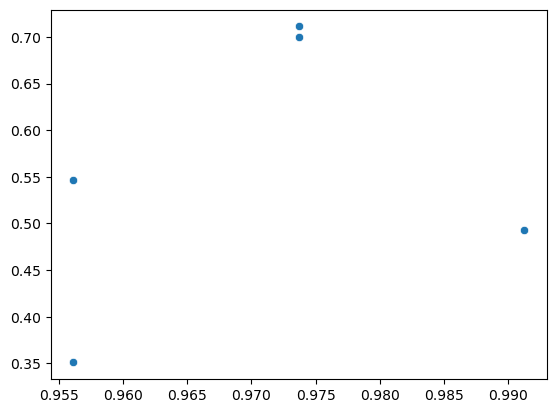

In [127]:
import seaborn as sns
sns.scatterplot(x = accu , y = LRs)

- High LR means low Accuracy
- Harder for the model to converge

In [128]:
#Changing Epochs LR constant at 0.0001
# LRs = []
Epochs = []
accu = []
for i in range(0,5):
    weights = []
    import random
    for i in range(len(xtrain[1])):
        weights.append(random.uniform(-1,1))

    # LR = random.uniform(0,1)
    epochs =  round(random.uniform(100, 2000))
    # LRs.append(LR)
    Epochs.append(epochs)
    

    print(f'Epcohs : {epochs}') 

    weights = fit(xtrain=xtrain , ytrain=y_train , weights=weights  , LR = 0.0001 ,  epochs = epochs)
  
    from sklearn.metrics import accuracy_score , f1_score , recall_score , precision_score
    p = predict(xtest,weights)
    print('\naccuracy_score : ' , accuracy_score(y_test ,p) )
    accu.append(accuracy_score(y_test ,p))
    print('F1 score:', f1_score(y_test, p))
    print('Recall:', recall_score(y_test , p))
    print('Precision:', precision_score(y_test , p), '\n')




Epcohs : 920

accuracy_score :  0.3684210526315789
F1 score: 0.4193548387096774
Recall: 0.36619718309859156
Precision: 0.49056603773584906 

Epcohs : 911

accuracy_score :  0.6140350877192983
F1 score: 0.6944444444444443
Recall: 0.704225352112676
Precision: 0.684931506849315 

Epcohs : 939

accuracy_score :  0.7982456140350878
F1 score: 0.832116788321168
Recall: 0.8028169014084507
Precision: 0.8636363636363636 

Epcohs : 1177

accuracy_score :  0.5263157894736842
F1 score: 0.608695652173913
Recall: 0.5915492957746479
Precision: 0.6268656716417911 

Epcohs : 693

accuracy_score :  0.8596491228070176
F1 score: 0.8857142857142857
Recall: 0.8732394366197183
Precision: 0.8985507246376812 



<Axes: >

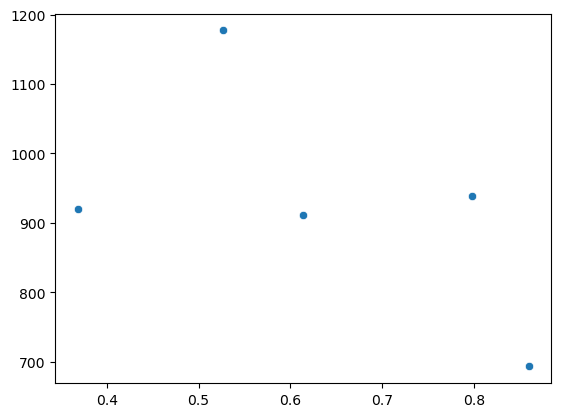

In [129]:
import seaborn as sns
sns.scatterplot(x = accu , y = Epochs)

- low epochs are getting better results 

- random weights could be the reason the plot has no trend 
